In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# import warnings
# warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [2]:
data = pd.read_csv(r'C:\Users\Mohamed.Imran\Desktop\Imran\Inceptez\Logistic_Regression\weight-height.csv')

In [3]:
data[:5]

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
data['Gender'].value_counts()

Female    5000
Male      5000
Name: Gender, dtype: int64

In [5]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [6]:
data.groupby('Gender').agg({'Height': ['mean', 'min', 'max']})

Height                      
             mean        min        max
Gender                                 
Female  63.708774  54.263133  73.389586
Male    69.026346  58.406905  78.998742

In [7]:
data.groupby('Gender').agg({'Weight': ['mean', 'min', 'max']})

Weight                        
              mean         min         max
Gender                                    
Female  135.860093   64.700127  202.237214
Male    187.020621  112.902939  269.989699

In [8]:
data['Gender'] = np.where(data['Gender'] == 'Male', 0, 1)

In [9]:
data[:3]

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856


In [10]:
X = data[['Height', 'Weight']]
y = data['Gender']

In [11]:
X.shape, y.shape

((10000, 2), (10000,))

In [12]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state = 0)

In [13]:
model = LogisticRegression()

In [14]:
model.fit(train_X, train_y)

LogisticRegression()

In [26]:
train_X[:4]

,Height,Weight
7681,62.242876,139.400353
9031,64.882136,140.066733
3691,69.432019,200.341272
202,75.140821,224.124271


In [16]:
model.coef_, model.intercept_

(array([[ 0.49548897, -0.20348725]]), array([0.01041207]))

In [17]:
y.value_counts()

1    5000
0    5000
Name: Gender, dtype: int64

In [18]:
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

In [19]:
def metric_score(actual, pred):
    print('confusion matrix: ', confusion_matrix(actual, pred))
    print('accuracy score: ', accuracy_score(actual, pred))
    print('recall_score: ', recall_score(actual, pred))
    print('precision score: ', precision_score(actual, pred))
    print('f1 score: ', f1_score(actual, pred))
    print('roc auc score: ', roc_auc_score(actual, pred))
    print('classification report : ', classification_report(actual, pred))
    

In [20]:
import sklearn
sklearn.__version__

'0.24.1'

In [25]:
# !pip install -U scikit-learn

In [22]:
metric_score(train_y, train_pred)

confusion matrix:  [[3215  274]
 [ 291 3220]]
accuracy score:  0.9192857142857143
recall_score:  0.9171176303047565
precision score:  0.9215798511734402
f1 score:  0.9193433261955746
roc auc score:  0.919292549746818
classification report :                precision    recall  f1-score   support

           0       0.92      0.92      0.92      3489
           1       0.92      0.92      0.92      3511

    accuracy                           0.92      7000
   macro avg       0.92      0.92      0.92      7000
weighted avg       0.92      0.92      0.92      7000



In [23]:
3511 +3489 

7000

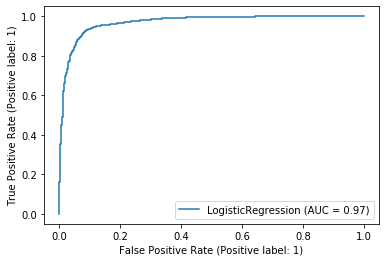

In [24]:
plot_roc_curve(model, test_X, test_y)